In [1]:
%load_ext autoreload

import pandas as pd
%autoreload 2
import sys
sys.path.append("/Users/timothyxp/libs/ppscore/src/")
import ppscore as pps
import warnings
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('autos.csv', parse_dates=['dateCreated', 'lastSeen'])
print(df.shape)
df.head()

(247872, 14)


,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26,2016-04-06 10:45:34,96224,2000


In [3]:
%%time
pps_matrix = pps.matrix(df, verbose=True, n_jobs=-1)

CPU times: user 83.2 ms, sys: 48.8 ms, total: 132 ms
Wall time: 3.54 s


<AxesSubplot:xlabel='x', ylabel='y'>

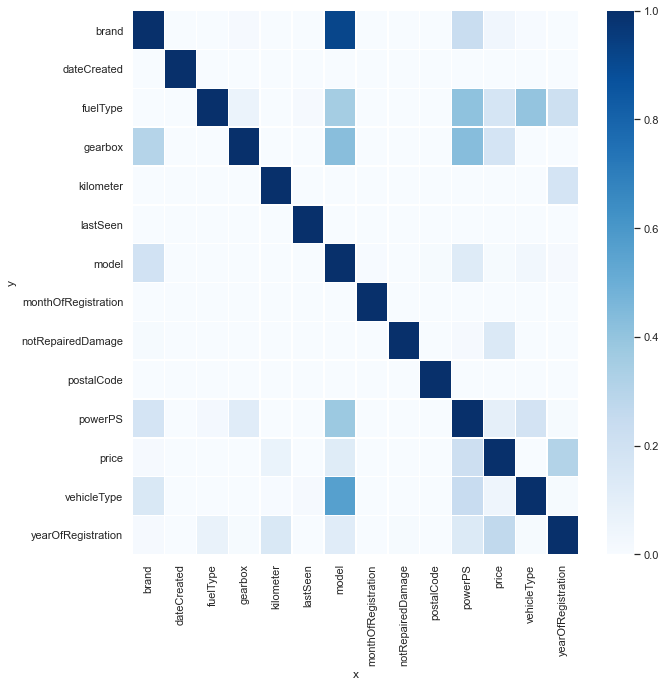

In [4]:
ax, fig = plt.subplots(figsize=(10, 10))
sns.heatmap(
    pps_matrix.pivot("y", "x", "ppscore"),
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5
)

кроме банальных  вещей видно что фичи fuelType, gearbox,powerPS и vehicleType хорошо предсказываются по модели,
потому что уникальных значений там не так много


Видно что хорошая зависимость у цены только с 6-ю фичами. Одна из них model, которой 250 уникальных значений



проверим на синтетических данных как он ловит нелинейные зависимости

In [5]:
test_df = pd.DataFrame(np.arange(-50, 50), columns=["feature_0"])
test_df["feature_1"] = test_df["feature_0"] ** 2
test_df['feature_2'] = test_df['feature_0'] ** 3

100%|██████████| 9/9 [00:00<00:00, 109.70it/s]


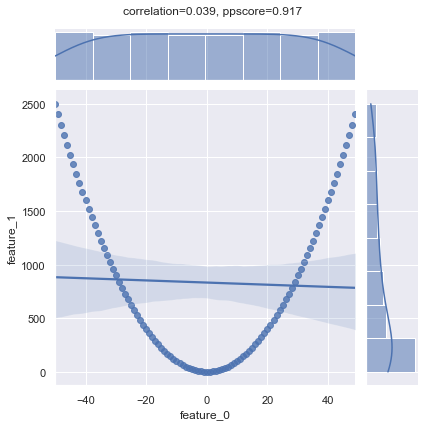

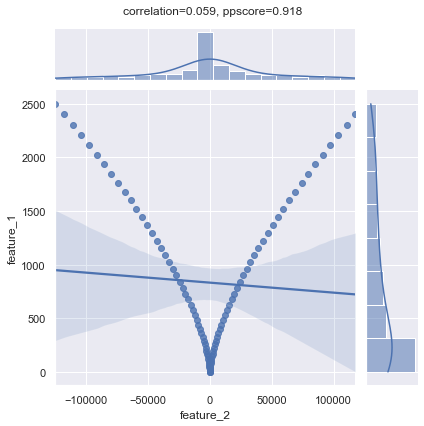

In [6]:
nonl_df = pps.nonlinear_features(test_df, plot_nonlinear_features=True)

In [7]:
fraud_df = pd.read_csv("datasets/santander_value_pred/TRAIN.csv")
print(fraud_df.shape)
fraud_df.head()

(2702, 4994)


,Unnamed: 0,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466,TARGET
0,1,000fbd867,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,600000.0
1,2,0027d6b71,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,10000000.0
2,3,0028cbf45,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,2000000.0
3,4,002a68644,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,14400000.0
4,5,002dbeb22,0.0,0,0.0,0,0,0,0,0,...,5600000.0,20000000.0,0,0,0,0,0,0,11000,2800000.0


In [113]:
predictors = pps.predictors(fraud_df, 'TARGET', verbose=True)

100%|██████████| 17/17 [00:00<00:00, 80.59it/s]


In [114]:
predictors.head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Unnamed: 0,TARGET,0,regression,True,mean absolute error,5.118511e+06,7.649110e+06,DecisionTreeRegressor()
1,ID,TARGET,0,feature_is_id,True,None,0.000000e+00,0.000000e+00,None
2,48df886f9,TARGET,0,regression,True,mean absolute error,5.118511e+06,5.882258e+06,DecisionTreeRegressor()
3,0deb4b6a8,TARGET,0,regression,True,mean absolute error,5.118511e+06,5.889217e+06,DecisionTreeRegressor()
4,34b15f335,TARGET,0,regression,True,mean absolute error,5.118511e+06,5.897201e+06,DecisionTreeRegressor()


In [115]:
predictors.ppscore.mean()

0.0

видно что для фрода совсем не дает ничего, скорее всего тут фичи в совокупности важны а не по одиночке

In [20]:
house_prices = pd.read_csv("datasets/house_prices/TRAIN.csv")
print(house_prices.shape)
house_prices.head()

(895, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TARGET
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
4,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [24]:
{col:(house_prices[col].unique().shape[0], house_prices.dtypes[col]) for col in house_prices}

{'Unnamed: 0': (895, dtype('int64')),
 'Id': (895, dtype('int64')),
 'MSSubClass': (15, dtype('int64')),
 'MSZoning': (5, dtype('O')),
 'LotFrontage': (98, dtype('float64')),
 'LotArea': (693, dtype('int64')),
 'Street': (2, dtype('O')),
 'Alley': (3, dtype('O')),
 'LotShape': (4, dtype('O')),
 'LandContour': (4, dtype('O')),
 'Utilities': (1, dtype('O')),
 'LotConfig': (5, dtype('O')),
 'LandSlope': (3, dtype('O')),
 'Neighborhood': (25, dtype('O')),
 'Condition1': (9, dtype('O')),
 'Condition2': (4, dtype('O')),
 'BldgType': (5, dtype('O')),
 'HouseStyle': (8, dtype('O')),
 'OverallQual': (9, dtype('int64')),
 'OverallCond': (9, dtype('int64')),
 'YearBuilt': (106, dtype('int64')),
 'YearRemodAdd': (61, dtype('int64')),
 'RoofStyle': (6, dtype('O')),
 'RoofMatl': (7, dtype('O')),
 'Exterior1st': (15, dtype('O')),
 'Exterior2nd': (15, dtype('O')),
 'MasVnrType': (5, dtype('O')),
 'MasVnrArea': (239, dtype('float64')),
 'ExterQual': (4, dtype('O')),
 'ExterCond': (5, dtype('O')),
 'Fou

видно что некоторые по сути категориальные переменные имеют тип int, во всех сложно разбираться, возьмем категориальными там где значений уникальных меньше 20

In [44]:
def cast_to_cat(df, border=20):
    for col in df:
        if df.dtypes[col].kind == 'i' and np.unique(df[col]).shape[0] <= 20:
            df[col] = df[col].astype('category')
    return df

In [45]:
house_prices = house_prices.pipe(cast_to_cat)

In [103]:
predictors = pps.predictors(house_prices, 'TARGET', verbose=True)

100%|██████████| 81/81 [00:00<00:00, 84.14it/s]


по сути получаем что-то типо feature importance до построения модели

Тут конечно нельзя утверждать что фичи которые имееют pps=0 не нужны для модели, возможно они раскрываются только в комбинации с другими фичами, ppscore это не учитывает

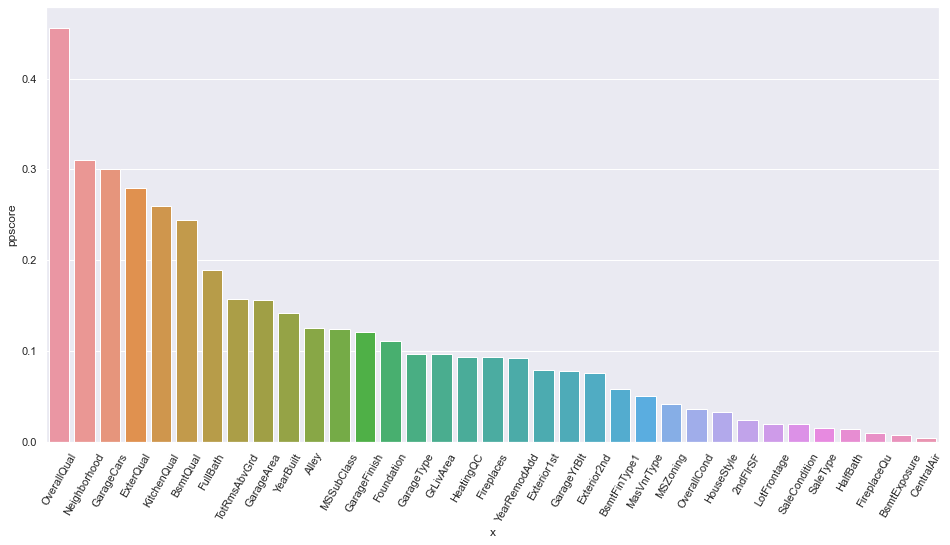

In [104]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=predictors[predictors.ppscore.gt(0)], x="x", y="ppscore", ax=ax)
plt.xticks(rotation=60);

In [105]:
%%time
good_features = predictors[predictors.ppscore.gt(0)].x.tolist()[:20] + ["TARGET"]
print(len(good_features))
pps_matrix = pps.matrix(house_prices[good_features], n_jobs=-1)

21
CPU times: user 34.2 ms, sys: 64 ms, total: 98.3 ms
Wall time: 4 s


<AxesSubplot:xlabel='x', ylabel='y'>

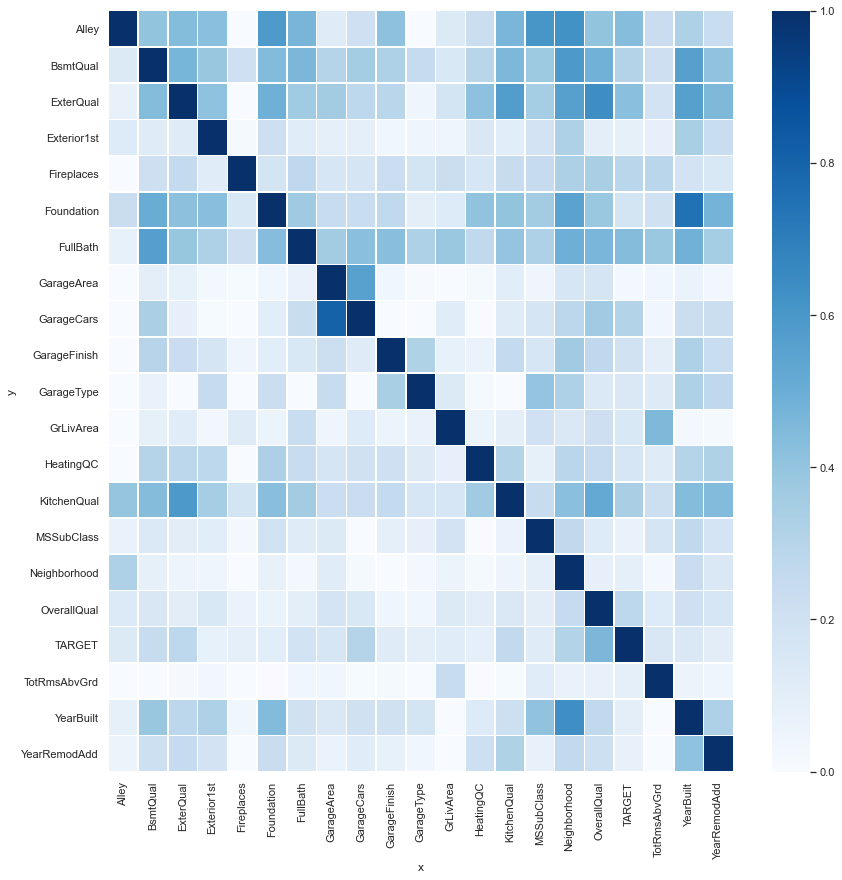

In [107]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(
    pps_matrix.pivot("y", "x", "ppscore"),
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5,
    ax=ax
)

посмотрим на некоторые распределения где есть судя по матрице хорошая зафисимость. 

Первое - зависимость типа материала от года

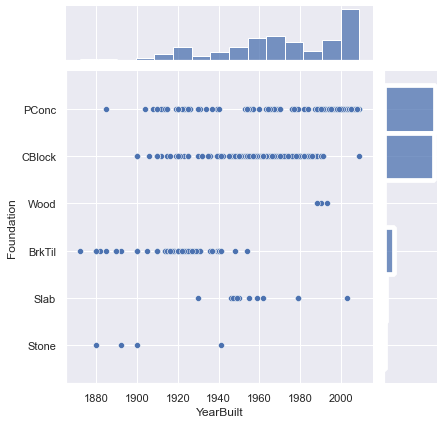

In [108]:
sns.jointplot(
    data=house_prices,
    y='Foundation',
    x='YearBuilt'
)

Зависимость года постройки от района, видно когда застраивались районы

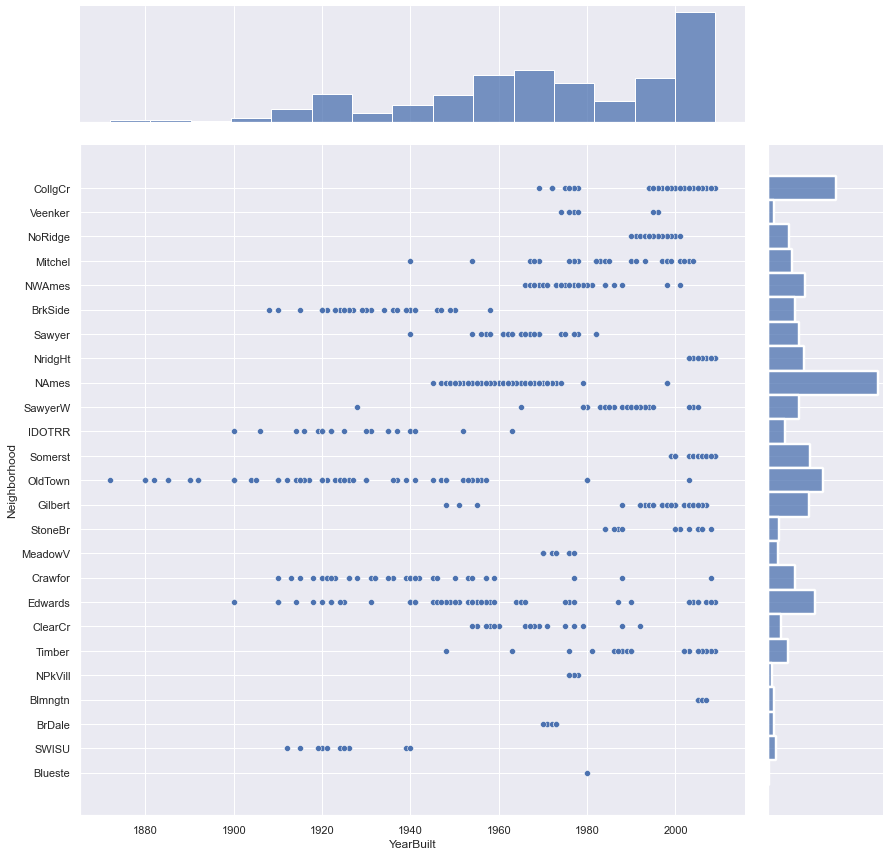

In [109]:
sns.jointplot(
    data=house_prices,
    x='YearBuilt',
    y='Neighborhood',
    height=12
)

100%|██████████| 441/441 [00:06<00:00, 69.23it/s]


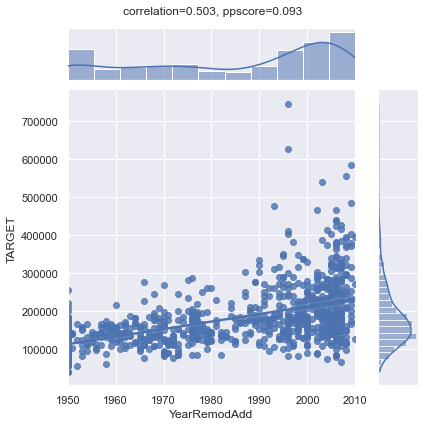

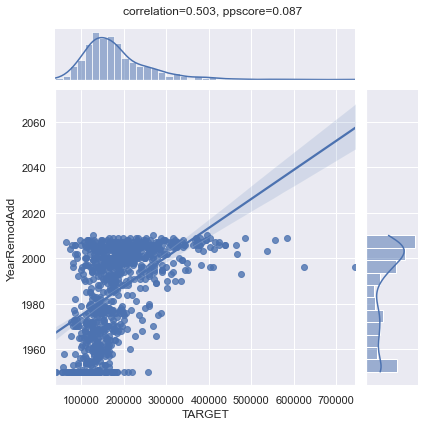

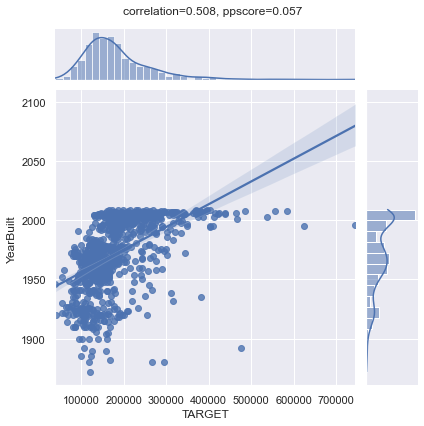

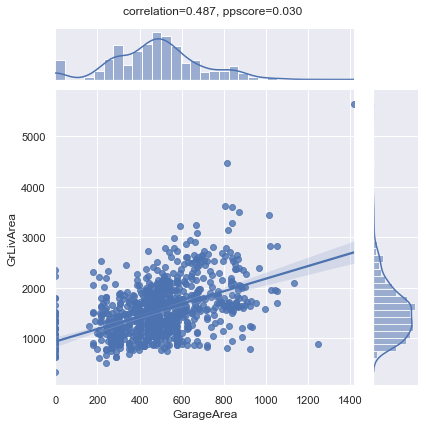

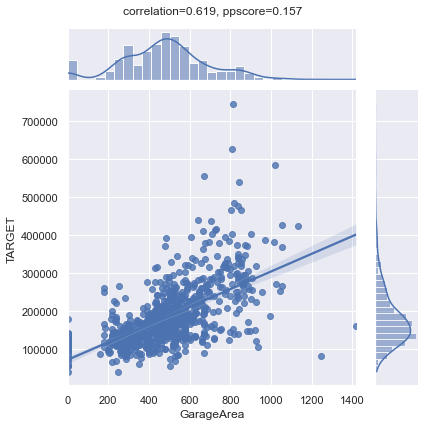

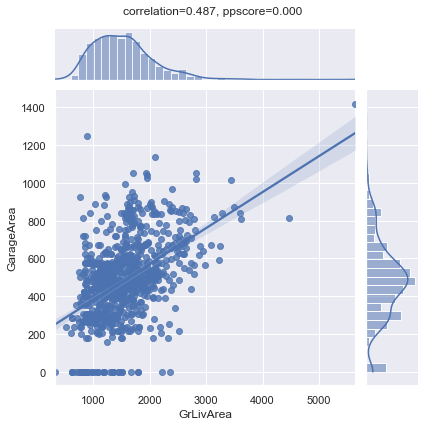

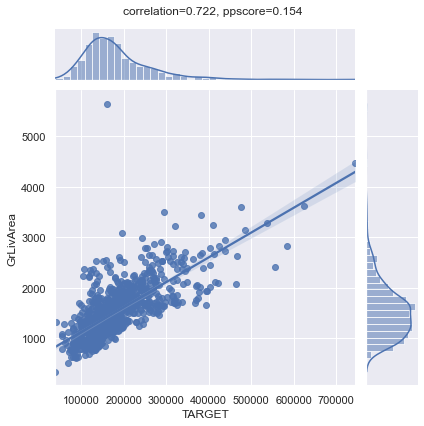

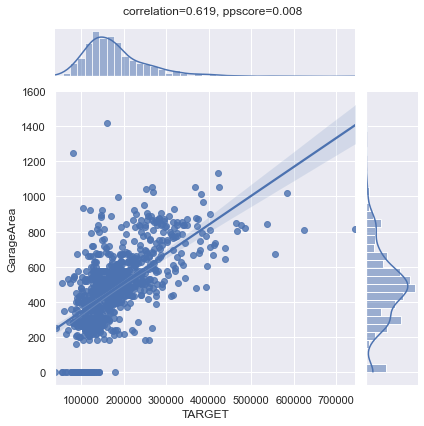

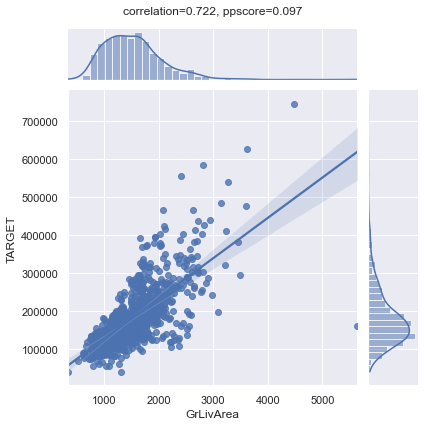

In [111]:
nonl_df = pps.nonlinear_features(house_prices[good_features], plot_nonlinear_features=True, pos_border=0.4)

видно что много фичей где корреляция сильная но при этом очень большой шум, ppscore не видит зависимостей

In [13]:
titanic_df = pd.read_csv("datasets/titanic/train.csv")
print(titanic_df.shape)
titanic_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


тут важно задавать категориальные переменные, потому что сам он может решить что это регрессия и не получить никакой зависимости, а она может быть

In [14]:
cat_features = ['SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

for col in cat_features:
    titanic_df[col] = titanic_df[col].astype('category')

In [94]:
%%time
pps_matrix = pps.matrix(titanic_df, verbose=True, n_jobs=-1)

CPU times: user 32.9 ms, sys: 84.3 ms, total: 117 ms
Wall time: 4.04 s


<AxesSubplot:xlabel='x', ylabel='y'>

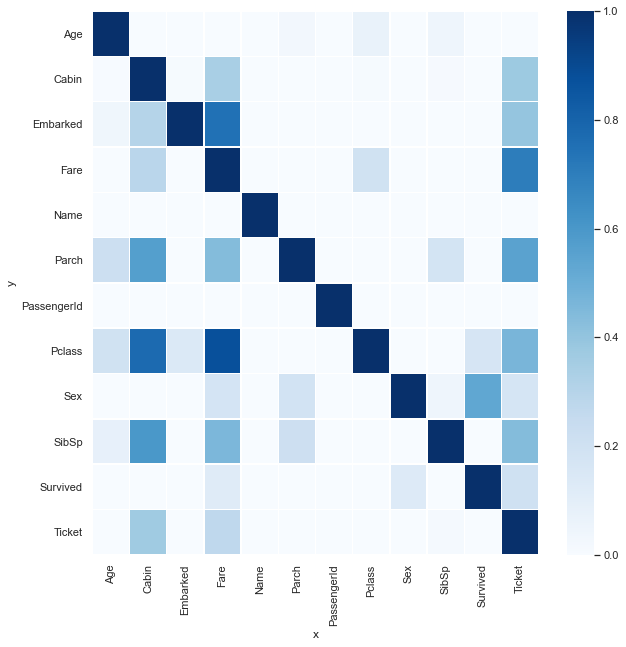

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    pps_matrix.pivot("y", "x", "ppscore"),
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5,
    ax=ax
)

впринципе видна зависимость зависимость таргеты от пола и от билета(тут скорее всего произошел лик, потому что уникальных значений билетов оч много)

Так же видны четкие зависимости Класса от цены билета. Еще видна зависимость порта посадки от цены билета

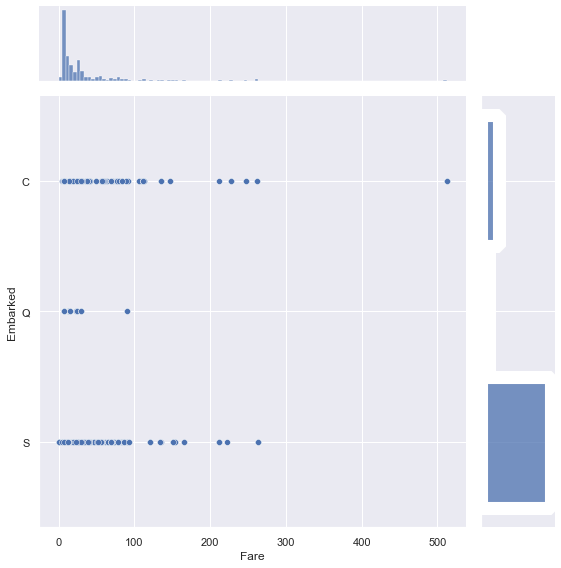

In [97]:
sns.jointplot(
    data=titanic_df.dropna(subset=['Embarked']),
    y='Embarked',
    x='Fare',
    height=8
)

посмотрим также на матрицу корреляций(только для численных фичей)

<AxesSubplot:>

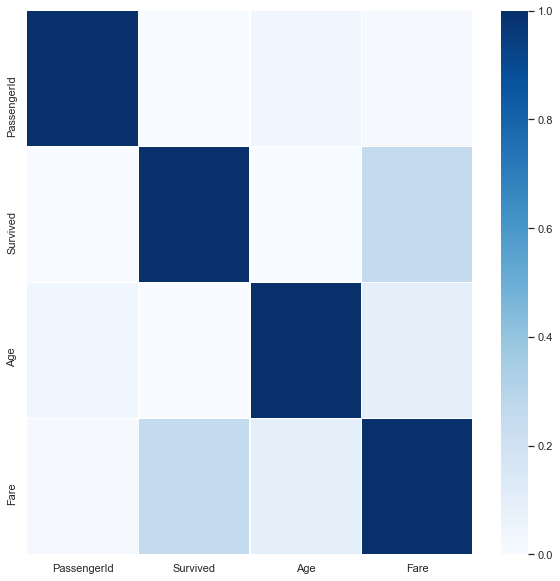

In [83]:
ax, fig = plt.subplots(figsize=(10, 10))
sns.heatmap(
    titanic_df.corr(),
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5
)

In [84]:
nonl_df = pps.nonlinear_features(titanic_df, plot_nonlinear_features=True, pos_border=0.1)

100%|██████████| 144/144 [00:02<00:00, 62.69it/s]


тут нелинейных фичей не нашлось, численнных фичей впринципе мало